# Lab 05 Regression

As seen during class, there are many requirements on the data we feed to simple linear regression (SLR). In this lab, your task is to recreate the visual work in class to determine whether a dataset is appropriate for SLR and show how you are able to apply the technique to a previously-unseen dataset.

## Data

| Dataset | Target  | Predictors                        |
|---------|---------|-----------------------------------|
| Toluca  | LotSize | workHours                         |
| Credit  | Limit   | Income Rating Cards Age Education |

## Process
For each predictor, your implementation must:
- Plot the predictor against the target
- Plot the residual against the target
- Determine the coefficients (slope, intercept) against the target
... and based on the above, you must determine whether the predictor is suitable for SLR.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

## 1 Toluca dataset

In [3]:
df = pd.read_csv('toluca.csv')
df

,lotSize,workHours
0,80,399
1,30,121
2,50,221
3,90,376
4,70,361
5,60,224
6,120,546
7,80,352
8,100,353
9,50,157


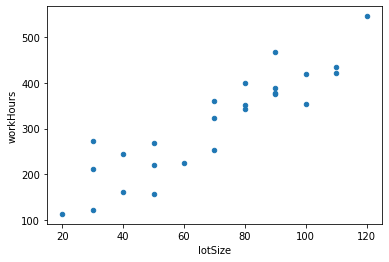

In [4]:
df.plot(kind='scatter', x='lotSize', y='workHours')

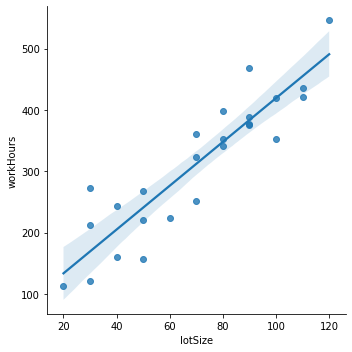

In [5]:
plot = sns.lmplot(y='workHours', x='lotSize', data=df)

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Lot Size')]

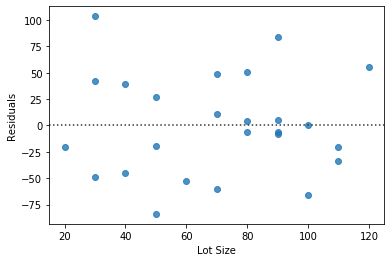

In [6]:
r1 = sns.residplot('lotSize', 'workHours', data=df)
r1.set(xlabel='Lot Size', ylabel='Residuals')

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df.drop('workHours', axis=1), df.iloc[:,1])
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print('Intercept', lin_reg.intercept_, '; Slope:', lin_reg.coef_)

Intercept 62.36585858585849 ; Slope: [3.57020202]


## 2 Credit

In [21]:
df = pd.read_csv("Credit.csv")
df = df.drop(['Gender', 'Student', 'Married', 'Ethnicity'], axis = 1)
df

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
0,1,14.891,3606,283,2,34,11,333
1,2,106.025,6645,483,3,82,15,903
2,3,104.593,7075,514,4,71,11,580
3,4,148.924,9504,681,3,36,11,964
4,5,55.882,4897,357,2,68,16,331
...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,560
396,397,13.364,3838,296,5,65,17,480
397,398,57.872,4171,321,5,67,12,138
398,399,37.728,2525,192,1,44,13,0


### 2.1 Income

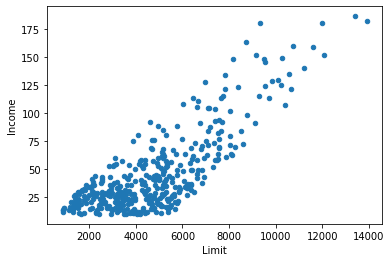

In [22]:
df.plot(kind='scatter', x='Limit', y='Income')

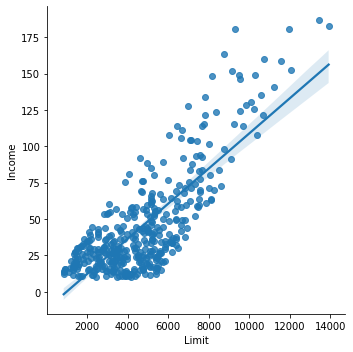

In [23]:
plot = sns.lmplot(y='Income', x='Limit', data=df)

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Limit')]

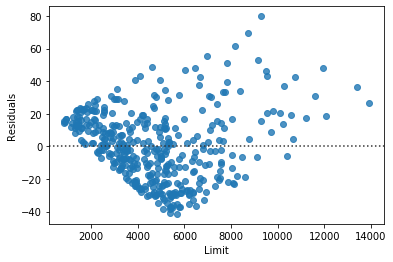

In [24]:
r1 = sns.residplot('Limit', 'Income', data=df)
r1.set(xlabel='Limit', ylabel='Residuals')

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(df.drop('Income', axis=1), df.iloc[:,1])
print('Intercept', lin_reg.intercept_, '; Slope:', lin_reg.coef_)

Intercept -43.070495644967004 ; Slope: [ 0.00189767  0.00942743  0.20885449  0.01906196  0.0400733   0.08478929
 -0.06594818]


Thus this predictor is not suitable for SLR.

### 2.2 Rating

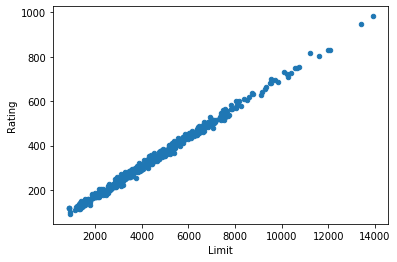

In [36]:
df.plot(kind='scatter', x='Limit', y='Rating')

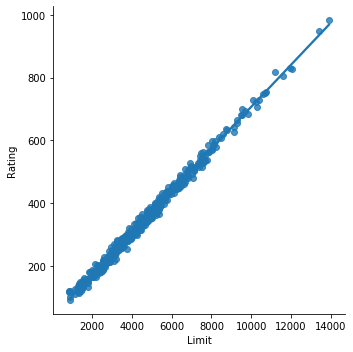

In [37]:
plot = sns.lmplot(y='Rating', x='Limit', data=df)

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Limit')]

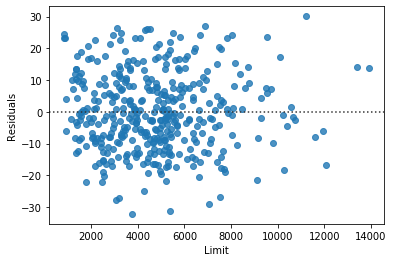

In [38]:
r1 = sns.residplot('Limit', 'Rating', data=df)
r1.set(xlabel='Limit', ylabel='Residuals')

In [39]:
lin_reg = LinearRegression()
lin_reg.fit(df.drop('Rating', axis=1), df.iloc[:,1])
print('Intercept', lin_reg.intercept_, '; Slope:', lin_reg.coef_)

Intercept -3.552713678800501e-14 ; Slope: [ 8.80420070e-17  1.00000000e+00  1.11022302e-16 -2.06377884e-15
  1.24900090e-16 -1.84406527e-15 -4.85722573e-17]


Thus this predictor is suitable for SLR.

### 2.3 Cards

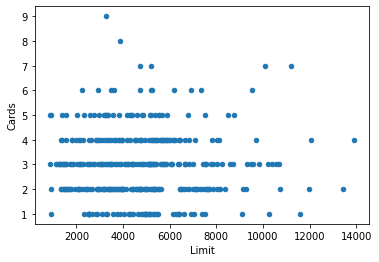

In [40]:
df.plot(kind='scatter', x='Limit', y='Cards')

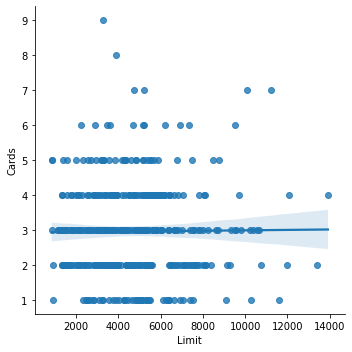

In [41]:
plot = sns.lmplot(y='Cards', x='Limit', data=df)

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Limit')]

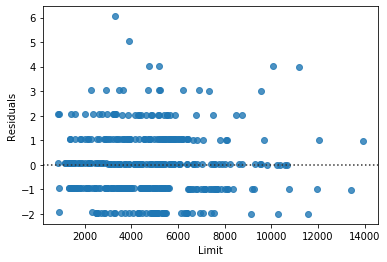

In [42]:
r1 = sns.residplot('Limit', 'Cards', data=df)
r1.set(xlabel='Limit', ylabel='Residuals')

In [43]:
lin_reg = LinearRegression()
lin_reg.fit(df.drop('Cards', axis=1), df.iloc[:,1])
print('Intercept', lin_reg.intercept_, '; Slope:', lin_reg.coef_)

Intercept 1.4068746168049984e-12 ; Slope: [ 2.64660329e-16  1.00000000e+00 -3.33066907e-16  7.35522754e-16
  2.46330734e-16  1.74739509e-15  1.04083409e-16]


Thus this predictor is not suitable for SLR.

### 2.4 Age

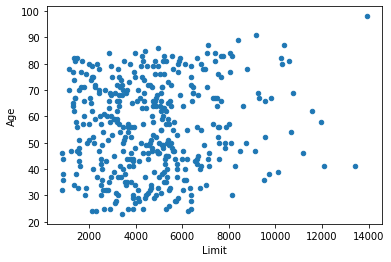

In [44]:
df.plot(kind='scatter', x='Limit', y='Age')

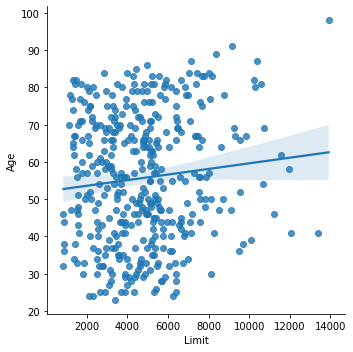

In [45]:
plot = sns.lmplot(y='Age', x='Limit', data=df)

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Limit')]

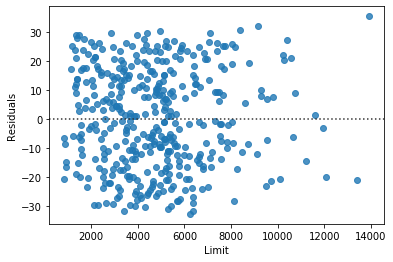

In [46]:
r1 = sns.residplot('Limit', 'Age', data=df)
r1.set(xlabel='Limit', ylabel='Residuals')

In [47]:
lin_reg = LinearRegression()
lin_reg.fit(df.drop('Age', axis=1), df.iloc[:,1])
print('Intercept', lin_reg.intercept_, '; Slope:', lin_reg.coef_)

Intercept -2.4158453015843406e-13 ; Slope: [ 8.66082752e-16  1.00000000e+00  0.00000000e+00  5.55111512e-17
 -3.80381490e-15 -4.64268923e-16  2.49800181e-16]


Thus this predictor is suitable for SLR.

### 2.5 Education

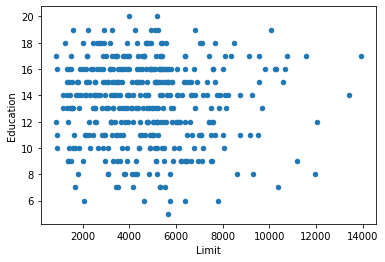

In [48]:
df.plot(kind='scatter', x='Limit', y='Education')

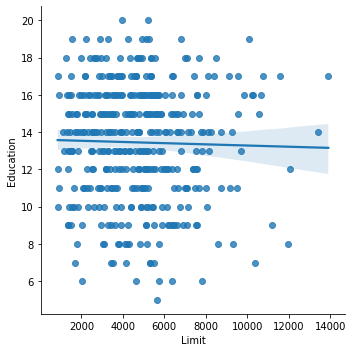

In [49]:
plot = sns.lmplot(y='Education', x='Limit', data=df)

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Limit')]

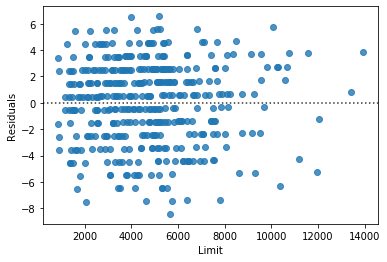

In [50]:
r1 = sns.residplot('Limit', 'Education', data=df)
r1.set(xlabel='Limit', ylabel='Residuals')

In [51]:
lin_reg = LinearRegression()
lin_reg.fit(df.drop('Education', axis=1), df.iloc[:,1])
print('Intercept', lin_reg.intercept_, '; Slope:', lin_reg.coef_)

Intercept -1.7053025658242404e-13 ; Slope: [-6.25002416e-18  1.00000000e+00 -1.11022302e-16 -7.35522754e-16
 -5.23561229e-16 -9.71445147e-17  0.00000000e+00]


Thus this predictor is not suitable for SLR.